In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
%magic

In [1]:
%store -r fcc_relevant
data = fcc_relevant
data

,is_sofw_dev,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
0,0,0,0,0,0,0,1,0,0,0,...,46,0,-1,0,2,1,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,22,0,0,0,6,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,28,1,1,0,2,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,22,0,1,0,3,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,19,0,1,0,4,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61086,0,0,0,0,0,0,0,0,0,0,...,22,0,0,0,8,0,0,0,1,0
61087,1,0,0,0,0,0,0,0,0,0,...,28,0,0,0,2,0,0,0,1,0
61089,0,0,0,0,0,0,0,0,0,0,...,23,0,0,2,4,1,1,1,0,0
61090,0,0,0,1,1,0,0,0,0,0,...,30,0,-1,0,4,0,0,0,1,0


In [3]:
data.describe()

,is_sofw_dev,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
count,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,...,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000
mean,0.216842,0.244435,0.146273,0.198638,0.121083,0.054326,0.348459,0.031582,0.080619,0.046789,...,28.127672,0.447503,0.611584,1.201459,4.025543,0.843831,0.534778,0.203046,0.787015,0.006017
std,0.412099,0.429757,0.353384,0.398979,0.326227,0.226663,0.476488,0.174886,0.272252,0.211189,...,7.407713,0.497242,0.593431,1.745515,2.552831,1.033025,1.042954,0.402271,0.409422,0.077334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,32.000000,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,52.000000,1.000000,1.000000,17.000000,19.000000,16.000000,19.000000,1.000000,1.000000,1.000000


In [4]:
data.is_sofw_dev.value_counts()

0    35535
1     9839
Name: is_sofw_dev, dtype: int64

In [5]:
list(data.columns)

['is_sofw_dev',
 'full_stack_wd',
 'back_end_wd',
 'front_end_wd',
 'mobile_dev',
 'devops',
 'data_sc',
 'qlty_eng',
 'ux_designer',
 'prod_manager',
 'game_dev',
 'inf_security',
 'data_eng',
 'hours_learning_week',
 'months_programming',
 'attended_bootcamp',
 'coding_expenses',
 'age',
 'debt',
 'employment',
 'youtube',
 'online_resources',
 'inperson_events',
 'podcasts',
 'gender_female',
 'gender_male',
 'gender_other']

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   # what's the difference??

# initialization of the scale
scaler = MinMaxScaler(feature_range=(0,1))

# apply the scale/model to the dataset.  
data['coding_expenses'] = scaler.fit_transform(data['coding_expenses'].values.reshape(-1, 1)) 

data.describe()

,is_sofw_dev,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
count,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,...,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000
mean,0.216842,0.244435,0.146273,0.198638,0.121083,0.054326,0.348459,0.031582,0.080619,0.046789,...,28.127672,0.447503,0.611584,1.201459,4.025543,0.843831,0.534778,0.203046,0.787015,0.006017
std,0.412099,0.429757,0.353384,0.398979,0.326227,0.226663,0.476488,0.174886,0.272252,0.211189,...,7.407713,0.497242,0.593431,1.745515,2.552831,1.033025,1.042954,0.402271,0.409422,0.077334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,32.000000,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,52.000000,1.000000,1.000000,17.000000,19.000000,16.000000,19.000000,1.000000,1.000000,1.000000


(array([42133.,  1243.,   492.,   287.,   378.,   142.,   240.,    83.,
          295.,    81.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

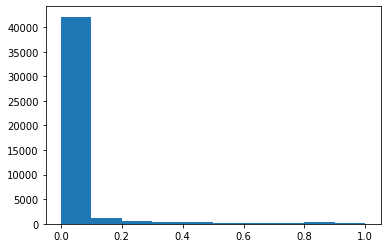

In [7]:
plt.hist(data['coding_expenses'])

In [8]:
data.describe()

,is_sofw_dev,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
count,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,...,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000
mean,0.216842,0.244435,0.146273,0.198638,0.121083,0.054326,0.348459,0.031582,0.080619,0.046789,...,28.127672,0.447503,0.611584,1.201459,4.025543,0.843831,0.534778,0.203046,0.787015,0.006017
std,0.412099,0.429757,0.353384,0.398979,0.326227,0.226663,0.476488,0.174886,0.272252,0.211189,...,7.407713,0.497242,0.593431,1.745515,2.552831,1.033025,1.042954,0.402271,0.409422,0.077334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,32.000000,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,52.000000,1.000000,1.000000,17.000000,19.000000,16.000000,19.000000,1.000000,1.000000,1.000000


In [9]:
data.is_sofw_dev.value_counts()

0    35535
1     9839
Name: is_sofw_dev, dtype: int64

In [11]:
y = data['is_sofw_dev']

X = data.drop(['is_sofw_dev'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=29)

In [12]:
acc_dict = {}

## Linear Regression

In [13]:
## Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc_lr = lr.score(X_test,y_test)*100

print(f"Logistic Regression Test Accuracy {round(acc_lr, 2)}%")

acc_dict['logistic regression'] = round(acc_lr,2)

Logistic Regression Test Accuracy 32.05%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.26280992, 0.88099174, 0.30071625, 0.38369146, 0.36808464])

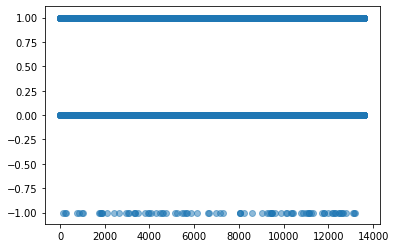

In [15]:
prediction = lr.predict(X_test)
x_plot = list(range(len(X_test)))
plt.scatter(x_plot,prediction-y_test, label = 'prediction', alpha = 0.5)
#plt.scatter(x_plot,y_test, label = 'test', alpha = 0.5)

## Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc_dtc, 2)}%")

acc_dict['Decision Tree Classifier'] = round(acc_dtc,2)

Decision Tree Test Accuracy 83.98%


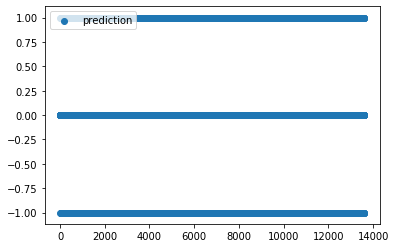

In [17]:
prediction = dtc.predict(X_test)
plt.scatter(x_plot,prediction-y_test, label = 'prediction', alpha = 1)
plt.legend()
plt.show()

In [18]:
cv_results = cross_val_score(dtc, X, y, cv=5) 
cv_results

array([0.80220386, 0.83250689, 0.83955923, 0.84209366, 0.83436191])

In [19]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, prediction),
    columns=['Predicted Not StwDev', 'Predicted StwDev'],
    index=['True Not StwDev', 'True StwDev'])

,Predicted Not StwDev,Predicted StwDev
True Not StwDev,9537,1101
True StwDev,1080,1895


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=3,
                            min_impurity_decrease=1e-07, )
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc_dtc, 2)}%")

acc_dict['Decision Tree Classifier'] = round(acc_dtc,2)

Decision Tree Test Accuracy 88.63%


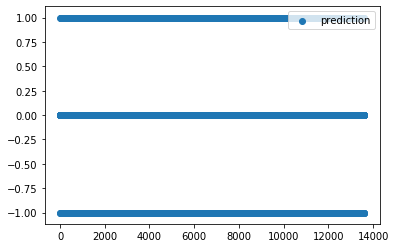

In [21]:
prediction = dtc.predict(X_test)
plt.scatter(x_plot,prediction-y_test, label = 'prediction', alpha = 1)
plt.legend()
plt.show()

In [22]:
cv_results = cross_val_score(dtc, X, y, cv=5) 
cv_results

array([0.86787879, 0.88958678, 0.89013774, 0.88705234, 0.88428477])

In [23]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, prediction),
    columns=['Predicted Not StwDev', 'Predicted StwDev'],
    index=['True Not StwDev', 'True StwDev'])

,Predicted Not StwDev,Predicted StwDev
True Not StwDev,9977,661
True StwDev,887,2088


In [24]:
from sklearn.tree.export import export_text
r = export_text(dtc, feature_names=list(X.columns), )

In [25]:
print (r)

|--- months_programming <= 12.50
|   |--- months_programming <= 6.50
|   |   |--- full_stack_wd <= 0.50
|   |   |   |--- attended_bootcamp <= 0.50
|   |   |   |   |--- months_programming <= 3.50
|   |   |   |   |   |--- front_end_wd <= 0.50
|   |   |   |   |   |   |--- online_resources <= 3.50
|   |   |   |   |   |   |   |--- months_programming <= 1.50
|   |   |   |   |   |   |   |   |--- inperson_events <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- inperson_events >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- months_programming >  1.50
|   |   |   |   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- online_resources >  3.50
|   |   |   |   |   |   |   |--- months_programming <= 0.50
|   |   |   |   |   |   |   |   |--- coding_expen

In [26]:
data.columns

Index(['is_sofw_dev', 'full_stack_wd', 'back_end_wd', 'front_end_wd',
       'mobile_dev', 'devops', 'data_sc', 'qlty_eng', 'ux_designer',
       'prod_manager', 'game_dev', 'inf_security', 'data_eng',
       'hours_learning_week', 'months_programming', 'attended_bootcamp',
       'coding_expenses', 'age', 'debt', 'employment', 'youtube',
       'online_resources', 'inperson_events', 'podcasts', 'gender_female',
       'gender_male', 'gender_other'],
      dtype='object')

## Try #2

Class 0: 35535
Class 1: 9839
Proportion: 3.61 : 1


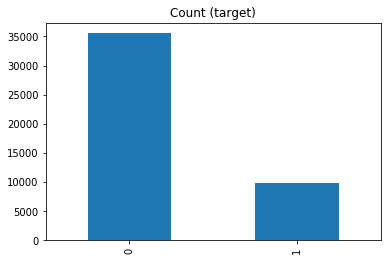

In [15]:
target_count = data.is_sofw_dev.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
1    9839
0    9839
Name: is_sofw_dev, dtype: int64


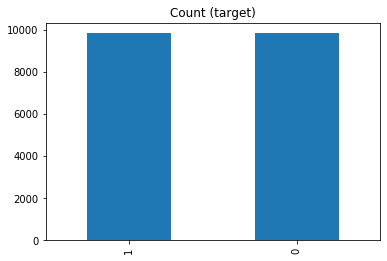

In [16]:
count_class_0, count_class_1 = data.is_sofw_dev.value_counts()
df_class_0 = data[data['is_sofw_dev'] == 0]
df_class_1 = data[data['is_sofw_dev'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.is_sofw_dev.value_counts())

df_test_under.is_sofw_dev.value_counts().plot(kind='bar', title='Count (target)');

In [17]:
data = df_test_under

In [18]:
data_balanced = data.copy()
%store data_balanced

Stored 'data_balanced' (DataFrame)


In [21]:
X1 = data.drop(columns={'is_sofw_dev','full_stack_wd', 'back_end_wd', 'front_end_wd',
       'mobile_dev', 'devops', 'data_sc', 'qlty_eng', 'ux_designer',
       'prod_manager', 'game_dev', 'inf_security', 'data_eng', 'debt'})
y = data['is_sofw_dev']

In [3]:
%store -r X_resampled
%store -r y_resampled
X = X_resampled
y = y_resampled

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=29)

In [5]:
X.shape

(19678, 13)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(2,12), 
              'min_samples_split': np.arange(2,10), 
              'min_samples_leaf': np.arange(1,10),  
              }

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print (f'DecisionTree: Area under the ROC curve = {tree_performance}')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.8604435812400307


In [8]:
tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [9]:
tree.best_score_

0.7933788296791056

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=2)
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc_dtc, 2)}%")

#acc_dict['Decision Tree Classifier'] = round(acc_dtc,2)

Decision Tree Test Accuracy 79.73%


In [11]:
dtc.score(X_train, y_train)*100

80.23086975461014

In [14]:
roc_auc_score(y_test, prediction)*100

79.72657585807237

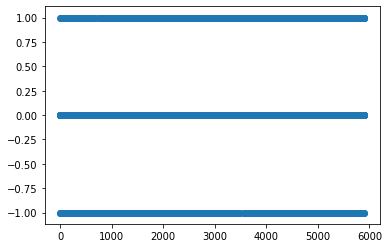

In [13]:
x_plot = list(range(len(X_test)))
prediction = dtc.predict(X_test)
plt.scatter(x_plot,prediction-y_test, label = 'prediction', alpha = 1)
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(
    confusion_matrix(y_test, prediction),
    columns=['Predicted Not StwDev', 'Predicted StwDev'],
    index=['True Not StwDev', 'True StwDev'])

cm

,Predicted Not StwDev,Predicted StwDev
True Not StwDev,2394,556
True StwDev,641,2313


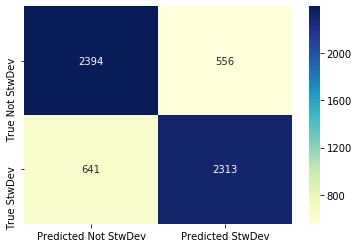

In [16]:
sns.heatmap(cm,cmap="YlGnBu", annot=True, fmt='g')

In [23]:
from sklearn.tree.export import export_text
r = export_text(dtc, feature_names=list(X1.columns))

In [24]:
print (r)

|--- months_programming <= 7.50
|   |--- months_programming <= 3.50
|   |   |--- employment <= 0.50
|   |   |   |--- inperson_events <= 0.50
|   |   |   |   |--- podcasts <= 1.50
|   |   |   |   |   |--- online_resources <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- online_resources >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- podcasts >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- inperson_events >  0.50
|   |   |   |   |--- employment <= -0.50
|   |   |   |   |   |--- hours_learning_week <= 9.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- hours_learning_week >  9.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- employment >  -0.50
|   |   |   |   |   |--- gender_female <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- gender_female >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- employment >  0.50
|   |   |   |--- attended_bootcamp <= 0.50
|   |   |   |   |--- on

In [25]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=list(X1.columns), class_names=True, filled=True,
                               rotate=True) 
graph = graphviz.Source(dot_data) 
graph.render("sftdev") 

'sftdev.pdf'

In [27]:
TP = cm['Predicted Not StwDev']['True Not StwDev']
FP = cm['Predicted StwDev']['True Not StwDev']
FN = cm['Predicted Not StwDev']['True StwDev']

In [28]:
print (f'Precision: {round(TP/(TP+FP)*100,2)}')
print (f'Recall: {round(TP/(TP+FN)*100,2)}')


Precision: 81.15
Recall: 78.88


In [59]:
data1 = data

%store data1

Stored 'data1' (DataFrame)


## Try #3

### Feature Selection

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X.shape

(19678, 13)

In [66]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.10515736, 0.2974946 , 0.01227076, 0.08941919, 0.12857408,
       0.11689336, 0.06071988, 0.08636408, 0.04886165, 0.04203845,
       0.00536165, 0.00591836, 0.00092659])

In [67]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(19678, 6)

In [82]:
%store X_new

Stored 'X_new' (ndarray)


In [68]:
y = data['is_sofw_dev']

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=29)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(2,12), 
              'min_samples_split': np.arange(2,10), 
              'min_samples_leaf': np.arange(1,10),  
              }

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print (f'DecisionTree: Area under the ROC curve = {tree_performance}')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.8547309020804883


In [70]:
tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [71]:
tree.best_score_

0.7877885871932627

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=2)
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc_dtc, 2)}%")

acc_dict['Decision Tree Classifier'] = round(acc_dtc,2)

Decision Tree Test Accuracy 79.23%


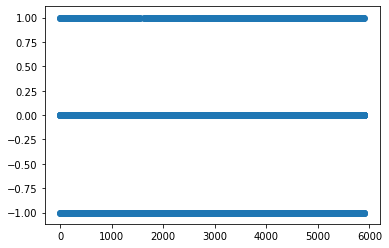

In [73]:
x_plot = list(range(len(X_test)))
prediction = dtc.predict(X_test)
plt.scatter(x_plot,prediction-y_test, label = 'prediction', alpha = 1)
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(
    confusion_matrix(y_test, prediction),
    columns=['Predicted Not StwDev', 'Predicted StwDev'],
    index=['True Not StwDev', 'True StwDev'])

cm

,Predicted Not StwDev,Predicted StwDev
True Not StwDev,2490,460
True StwDev,766,2188


In [81]:
TP = cm['Predicted Not StwDev']['True Not StwDev']
FP = cm['Predicted StwDev']['True Not StwDev']
FN = cm['Predicted Not StwDev']['True StwDev']

print (f'Precision: {round(TP/(TP+FP)*100,2)}')
print (f'Recall: {round(TP/(TP+FN)*100,2)}')


Precision: 84.41
Recall: 76.47
